In [1]:
# first importing pandas
import pandas as pd

In [15]:
df = pd.read_csv(
    'Property.csv',
    dtype=
    {
        'Geo_FIPS':str,
        'Geo_STATE':str,
        'Geo_COUNTY': str
    }
)

In [16]:
#Now, we add the extra zeros to GEO_FIPS column
df['Geo_FIPS'] = df['Geo_FIPS'].str.zfill(11)

In [21]:
#Choosing the columns I want to keep
columns_to_keep = ['Geo_FIPS','SE_A10035_001','PCT_SE_A10035_002','PCT_SE_A10035_003','PCT_SE_A10035_004','PCT_SE_A10035_005','PCT_SE_A10035_006','PCT_SE_A10035_007','PCT_SE_A10035_008','PCT_SE_A10035_009','PCT_SE_A10035_010']

In [22]:
#Saving the columns I want to keep as a variable
df2 = df[columns_to_keep]

In [25]:
#Changing the name of the Columns
df2.columns= ['FIPS',
              'All Owner-Occupied Units',
'Less than $20K',
'$20K-49K',
'50K-99K',
'100K-149K',
'150K-299K',
'300K-499K',
'500K-$749K',
'$750K-$999K',
'More than $1Million']

In [36]:
df2.head(5)

,FIPS,All Owner-Occupied Units,Less than $20K,$20K-49K,50K-99K,100K-149K,150K-299K,300K-499K,500K-$749K,$750K-$999K,More than $1Million
2,06037101220,582,2.06,0.0,0.00,0.0,1.89,12.20,58.25,19.24,6.36
3,06037101221,347,0.00,0.0,0.00,0.0,29.68,8.65,57.93,3.75,0.00
4,06037101222,31,77.42,0.0,0.00,0.0,0.00,0.00,22.58,0.00,0.00
5,06037101300,1134,0.00,0.0,2.56,0.0,0.00,5.73,28.92,46.74,16.05
6,06037101400,955,0.00,0.0,0.73,0.0,0.00,19.90,35.39,28.17,15.81


In [37]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2496 entries, 2 to 2497
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   FIPS                      2496 non-null   object 
 1   All Owner-Occupied Units  2496 non-null   int64  
 2   Less than $20K            2426 non-null   float64
 3   $20K-49K                  2426 non-null   float64
 4   50K-99K                   2426 non-null   float64
 5   100K-149K                 2426 non-null   float64
 6   150K-299K                 2426 non-null   float64
 7   300K-499K                 2426 non-null   float64
 8   500K-$749K                2426 non-null   float64
 9   $750K-$999K               2426 non-null   float64
 10  More than $1Million       2426 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 214.6+ KB


<Axes: ylabel='Frequency'>

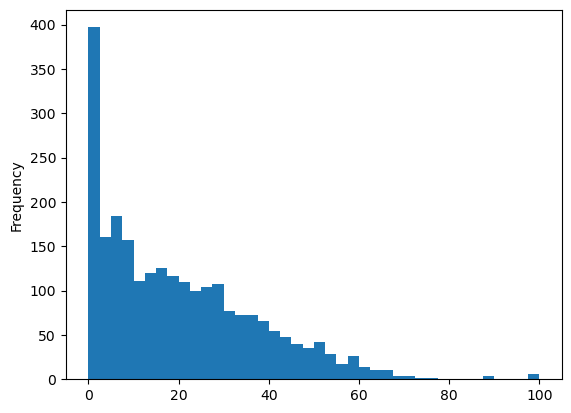

In [86]:
df2['$750K-$999K'].plot.hist(bins=40) 

In [98]:
#I am interpretating this as saying that in most census tracts, there is >20 observations of single-family homes with a value of $750K-$999k. Which is interesting, since, later in the growth, there seems to be some cooelation with oil wells present and observations of homes valued at $750K-$999K. However, when checking by % of all single-family housing in LA, ther is far less coorelation.

In [41]:
import geopandas as gpd

In [43]:
#creating a variable for the geojson with census tracts
tracts=gpd.read_file('Census_Tracts_2020.geojson')
tracts.head()

,OBJECTID,CT20,LABEL,ShapeSTArea,ShapeSTLength,geometry
0,1,101110,1011.10,1.229562e+07,15083.854287,"POLYGON ((-118.28491 34.25948, -118.28492 34.2..."
1,2,101122,1011.22,2.845774e+07,31671.455844,"POLYGON ((-118.29015 34.27417, -118.29015 34.2..."
2,3,101220,1012.20,7.522093e+06,12698.783810,"POLYGON ((-118.28100 34.25592, -118.28198 34.2..."
3,4,101221,1012.21,3.812000e+06,9161.710543,"POLYGON ((-118.28735 34.25591, -118.28863 34.2..."
4,5,101222,1012.22,3.191371e+06,9980.600461,"POLYGON ((-118.28594 34.25405, -118.28594 34.2..."


In [44]:
tracts = tracts[['CT20','geometry']]
tracts.head()

,CT20,geometry
0,101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2..."
1,101122,"POLYGON ((-118.29015 34.27417, -118.29015 34.2..."
2,101220,"POLYGON ((-118.28100 34.25592, -118.28198 34.2..."
3,101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2..."
4,101222,"POLYGON ((-118.28594 34.25405, -118.28594 34.2..."


In [45]:
tracts['FIPS'] ='06' + '037' + tracts['CT20']

In [46]:
tracts.head()

,CT20,geometry,FIPS
0,101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2...",06037101110
1,101122,"POLYGON ((-118.29015 34.27417, -118.29015 34.2...",06037101122
2,101220,"POLYGON ((-118.28100 34.25592, -118.28198 34.2...",06037101220
3,101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2...",06037101221
4,101222,"POLYGON ((-118.28594 34.25405, -118.28594 34.2...",06037101222


In [50]:
#Now, I merge the two into one new dataframe
tracts_750K=tracts.merge(df2,on="FIPS")

In [51]:
#and confirm if it worked the way I hoped
tracts_750K.head()

,CT20,geometry,FIPS,All Owner-Occupied Units,Less than $20K,$20K-49K,50K-99K,100K-149K,150K-299K,300K-499K,500K-$749K,$750K-$999K,More than $1Million
0,101220,"POLYGON ((-118.28100 34.25592, -118.28198 34.2...",06037101220,582,2.06,0.0,0.00,0.0,1.89,12.20,58.25,19.24,6.36
1,101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2...",06037101221,347,0.00,0.0,0.00,0.0,29.68,8.65,57.93,3.75,0.00
2,101222,"POLYGON ((-118.28594 34.25405, -118.28594 34.2...",06037101222,31,77.42,0.0,0.00,0.0,0.00,0.00,22.58,0.00,0.00
3,101300,"POLYGON ((-118.26530 34.25735, -118.26530 34.2...",06037101300,1134,0.00,0.0,2.56,0.0,0.00,5.73,28.92,46.74,16.05
4,101400,"POLYGON ((-118.29657 34.25356, -118.29694 34.2...",06037101400,955,0.00,0.0,0.73,0.0,0.00,19.90,35.39,28.17,15.81


In [90]:
tracts_750K['PCT_750'] = tracts_750K['$750K-$999K']/tracts_750K['All Owner-Occupied Units']*100


0        3.305842
1        1.080692
2        0.000000
3        4.121693
4        2.949738
          ...    
2488    15.597015
2489    16.978723
2490          NaN
2491          NaN
2492          NaN
Name: PCT_750, Length: 2493, dtype: float64

In [53]:
tracts_750K.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [54]:
df = pd.read_csv('Oil_Wells.csv')

In [55]:
gdf = gpd.GeoDataFrame(df, 
                       crs='epsg:4326',
                       geometry=gpd.points_from_xy(df.Longitude, df.Latitude))

In [56]:
gdf_act = gdf.drop(gdf[gdf['WellStatus'] != 'A'].index)

In [57]:
import matplotlib.pyplot as plt

In [58]:
import folium

In [102]:
m = folium.Map(location=[34.2,-118.2], 
               zoom_start = 9,
               tiles='CartoDB positron', 
               attribution='CartoDB')

# plot chorpleth over the base map
folium.features.Choropleth(
                  geo_data=tracts_750K, # geo data
                  data=tracts_750K, # data          
                  key_on='feature.properties.FIPS', # key, or merge column
                  columns=['FIPS','PCT_750'], # [key, value]
                  fill_color='YlOrBr',
                  line_weight=0.1, 
                  fill_opacity=0.8,
                  line_opacity=0.2, # line opacity (of the border)
                  legend_name='%Property Values $750-999k LA (2022').add_to(m)  

#create feature group so that business layer can be added to drop down
f2=folium.FeatureGroup(name='Oil Wells').add_to(m)

# add the businesses to the feature group
for index, row in gdf_act.iterrows():
    folium.Circle(
        radius=1,
        color="black",
        location=[row.Latitude,row.Longitude], 
        overlay=False).add_to(f2)

folium.LayerControl(position='topright', collapsed=True, autoZIndex=True).add_to(m)
m.save('RawDataPrpertyValues+oil.html')

In [103]:
m = folium.Map(location=[34.2,-118.2], 
               zoom_start = 9,
               tiles='CartoDB positron', 
               attribution='CartoDB')

# plot chorpleth over the base map
folium.features.Choropleth(
                  geo_data=tracts_750K, # geo data
                  data=tracts_750K, # data          
                  key_on='feature.properties.FIPS', # key, or merge column
                  columns=['FIPS','$750K-$999K'], # [key, value]
                  fill_color='YlOrBr',
                  line_weight=0.1, 
                  fill_opacity=0.8,
                  line_opacity=0.2, # line opacity (of the border)
                  legend_name='Property Values $750-999k LA (2022').add_to(m)  

#create feature group so that business layer can be added to drop down
f2=folium.FeatureGroup(name='Oil Wells').add_to(m)

# add the businesses to the feature group
for index, row in gdf_act.iterrows():
    folium.Circle(
        radius=1,
        color="black",
        location=[row.Latitude,row.Longitude], 
        overlay=False).add_to(f2)

folium.LayerControl(position='topright', collapsed=True, autoZIndex=True).add_to(m)
m.save('RawDataPrpertyValues+oil.html')